In [1]:
!pip install scikit-fuzzy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [381]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [382]:
x_massa_atual = np.arange(0, 20, 1)
x_distancia = np.arange(0, 20, 1)
x_resultado = np.arange(0, 20, 1) 

In [383]:
massa_atual = ctrl.Antecedent(x_massa_atual, 'massa_atual')
distancia = ctrl.Antecedent(x_distancia, 'distancia')
resultado = ctrl.Consequent(x_resultado, 'resultado')

In [384]:
### Massa
massa_atual['leve'] = fuzz.zmf(x_massa_atual, 5, 7)
massa_atual['medio'] = fuzz.trapmf(x_massa_atual, [4, 7, 10, 12])
massa_atual['pesado'] = fuzz.smf(x_massa_atual, 9, 16)

### Distância
distancia['proximo'] = fuzz.zmf(x_distancia, 5, 7)
distancia['medio'] = fuzz.trapmf(x_distancia, [4, 7, 10, 12])
distancia['distante'] = fuzz.smf(x_distancia, 9, 11)


resultado['ruim'] = fuzz.zmf(x_resultado, 5, 7)
resultado['medio'] = fuzz.trapmf(x_resultado, [7, 9, 11, 13])
resultado['bom'] = fuzz.smf(x_distancia, 13, 15)


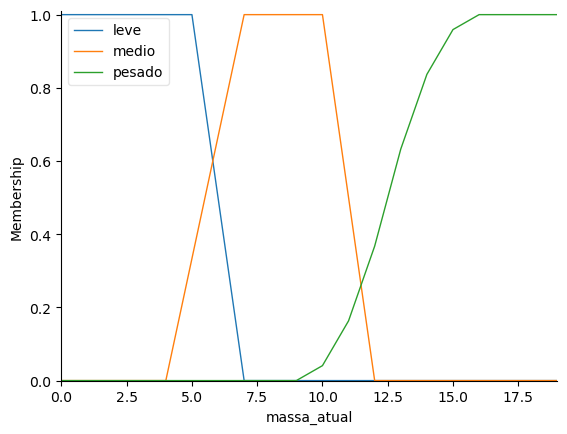

In [385]:
massa_atual.view()
#distancia.view()
#resultado.view()

In [281]:
rule1 = ctrl.Rule(massa_atual['leve'] & distancia['distante'], resultado['ruim'])
rule2 = ctrl.Rule(massa_atual['leve'] & distancia['medio'], resultado['ruim'])
rule3 = ctrl.Rule(massa_atual['leve'] & distancia['proximo'], resultado['medio'])


rule4 = ctrl.Rule(massa_atual['medio'] & distancia['distante'], resultado['ruim'])
rule5 = ctrl.Rule(massa_atual['medio'] & distancia['medio'], resultado['medio'])
rule6 = ctrl.Rule(massa_atual['medio'] & distancia['proximo'], resultado['medio'])


rule7 = ctrl.Rule(massa_atual['pesado'] & distancia['distante'], resultado['medio'])
rule8 = ctrl.Rule(massa_atual['pesado'] & distancia['medio'], resultado['bom'])
rule9 = ctrl.Rule(massa_atual['pesado'] & distancia['proximo'], resultado['bom'])


# 

In [282]:
SE_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
SE = ctrl.ControlSystemSimulation(SE_ctrl)

In [319]:
# Valores = 70, 10; 0, 10; 0, 7; 150, 1; 80, 3

elevador1 = {
    'massa': 20,
    'andar': 20
}

SE.input['massa_atual'] = elevador1['massa']
SE.input['distancia'] = elevador1['andar']

10.0


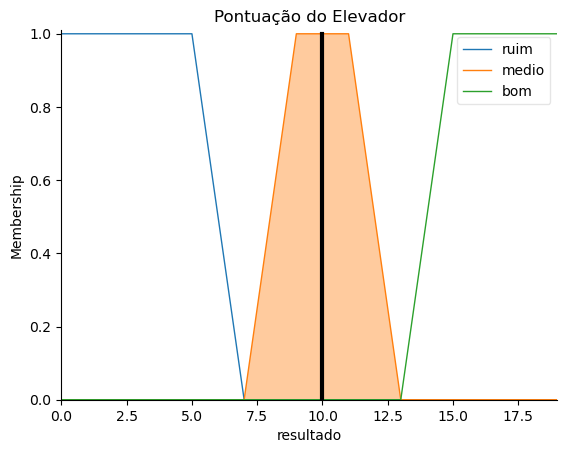

In [320]:
SE.compute()
print(SE.output['resultado'])
resultado.view(sim=SE)


plt.title("Pontuação do Elevador")
plt.show()